## OUTLIER DETECTION & REMOVAL, ENCODING CATEGORICAL VARIABLES AND STANDARDIZATION OF STUDENT_PERFORMANCE DATASET

### STEPS I TOOK:
### Load the data to pandas dataframe
### use .head to visualy inspect the first 5 rows of the data
### use .shape to check the total rows and columns in the data
### use .info to check the structure of the data inlcuding data types and missing value
### use .duplicated to check for duplicates in the data and removal if there is presence of any
### use .describe to get the statistical distribution of the data
### use .unique to check for mis-labels in categorical variables
### use correlation matrix to understand the relationship between the target variableand independent variable and select only the relevant features that relates well with the target variable
### using pairplot to visually examine the relationship between the target variable and other variable
### using scatter plot to check for ouliers between the target variable and other variables
### use boxplot check for outliers in the data and removal if there is presence of any
### use .describe again to get the statistical distribution of the data if ourliers were removed
### compare the min values within each numerical feature (same for max values) and rescale if the difference in values are wide apart.
### use density and box plot to check for normal distribution and normalize if its not normal
### Also, using histogram plot to also check for normality in the data
### Also, using probability plot to check for normality
### check the STD and standardize if the value is above 1
### Encoding Categorical variables
### using standardScaler to standardize the data such that the STD value = 1 and the mean value = 0


In [2]:
# importing the required libraries I will be working with
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# the path to the dataset I will be using
StudentsPerformance = "C:/Users/ICT/Desktop/OneCampus Python book/Py/kaggle_datasets/Students Performance in Exams/StudentsPerformance.csv"

In [4]:
df = pd.read_csv(StudentsPerformance)

In [5]:
# loading dataset to pandas dataframe and physical inspection of the first 5 rows of my data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### inspecting the structure of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# checking for duplicates in the data
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


### Data does not contain duplicate

### Checking for mis-spelling in all categorical variables

In [8]:
# getting all the columns in the data and casting them to a list
list(df.columns)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [9]:
# checking the uniquness of the gender column
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [10]:
# checking the uniquness of the race/ethnicity column
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [11]:
# checking the uniquness of the parental level of education column
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [12]:
# checking the uniquness of the lunch column
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [13]:
# checking the uniquness of the test preparation course column
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

### No mis-label in the categorical variables

### Checking for outlier in the data

C:\Users\ICT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


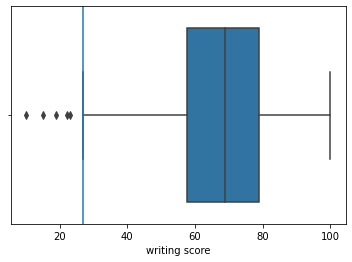

In [14]:
# checking for presence of outlier in writing score column using boxplot
sb.boxplot(df['writing score']).axvline(27)

In [15]:
# there is presence of outliers which are writing scores that are greater 27 based on the vertical line in the boxplot

C:\Users\ICT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


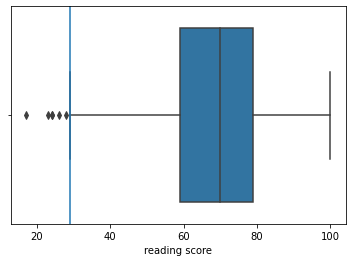

In [16]:
# checking for presence of outlier in reading score column using boxplot
sb.boxplot(df['reading score']).axvline(29)

In [17]:
# there is presence of outliers which are reading scores that are greater 29 based on the vertical line in the boxplot

C:\Users\ICT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


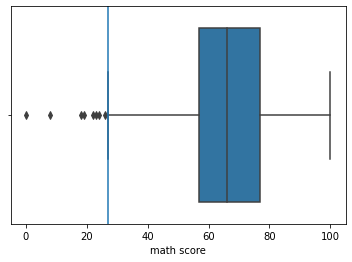

In [18]:
# checking for presence of outlier in math score column using boxplot
sb.boxplot(df['math score']).axvline(27)

In [19]:
# there is presence of outliers which are reading scores that are greater 27 based on the vertical line in the boxplot

### Removal of outliers in writing score, reading score and math score

In [20]:
# getting the writing score that are less than 27
wsOutlier = df[df['writing score'] < 27]
wsOutlier

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


In [21]:
#getting the index values of the outlier's rows
wsOutlier.index

Int64Index([59, 76, 327, 596, 980], dtype='int64')

In [22]:
#removing the ourliers using the index values
df = df.drop(list(wsOutlier.index))

In [23]:
# getting the reading score that are less than 29
rsOutlier = df[df['reading score'] < 29]
rsOutlier

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
211,male,group C,some college,free/reduced,none,35,28,27


In [24]:
#removing the ourliers using the index values
df = df.drop(list(rsOutlier.index))

In [25]:
# getting the math score that are less than 27
msOutlier = df[df['reading score'] < 27]
msOutlier

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [26]:
# Maths score outlier seems to have been removed as a result of removing outliers for reading and writing scores

C:\Users\ICT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


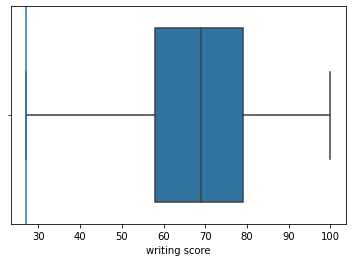

In [27]:
# checking for presence of outlier in writing score column using boxplot
sb.boxplot(df['writing score']).axvline(27)

C:\Users\ICT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


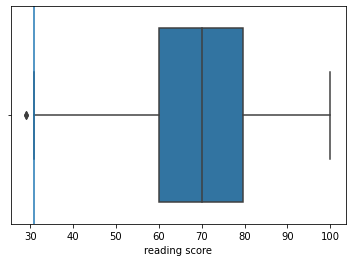

In [28]:
# checking for presence of outlier in reading score column using boxplot
sb.boxplot(df['reading score']).axvline(31)

In [29]:
# reading score outliers were not completely removed. Now I am checking for outlier for reading score less than 31
rsOutlier1 = df[df['reading score'] < 31]
rsOutlier1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
601,female,group C,high school,standard,none,29,29,30
896,male,group B,high school,free/reduced,none,36,29,27


In [30]:
# 2 outliers were indentified which has to be removed.
df = df.drop(list(rsOutlier1.index))

C:\Users\ICT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


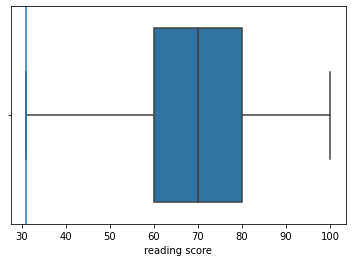

In [31]:
# checking for presence of outlier in reading score column using boxplot
sb.boxplot(df['reading score']).axvline(31)

C:\Users\ICT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


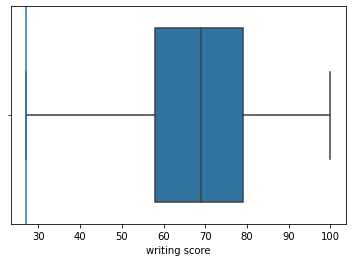

In [32]:
# checking for presence of outlier in writing score column using boxplot
sb.boxplot(df['writing score']).axvline(27)

C:\Users\ICT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


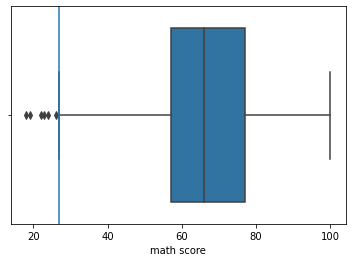

In [33]:
# checking for presence of outlier in math score column using boxplot
sb.boxplot(df['math score']).axvline(27)

In [34]:
# outliers for maths score has been revealed which are less than 27 and needs to be removed.
msOutlier1 = df[df['math score'] < 27]
msOutlier1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36


In [35]:
# 6 outliers were indentified which has to be removed.
df = df.drop(list(msOutlier1.index))

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       986 non-null    object
 1   race/ethnicity               986 non-null    object
 2   parental level of education  986 non-null    object
 3   lunch                        986 non-null    object
 4   test preparation course      986 non-null    object
 5   math score                   986 non-null    int64 
 6   reading score                986 non-null    int64 
 7   writing score                986 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 69.3+ KB


C:\Users\ICT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


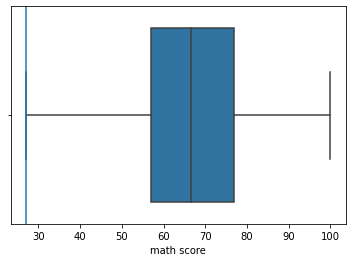

In [37]:
# checking again for presence of outlier in math score column using boxplot
sb.boxplot(df['math score']).axvline(27)

C:\Users\ICT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


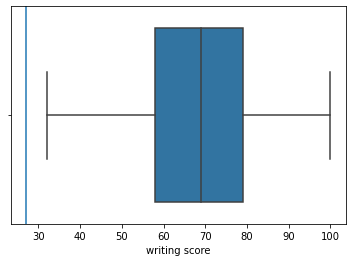

In [38]:
# checking again for presence of outlier in writing score column using boxplot
sb.boxplot(df['writing score']).axvline(27)

C:\Users\ICT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


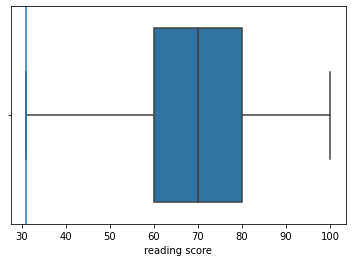

In [39]:
# checking again for presence of outlier in reading score column using boxplot
sb.boxplot(df['reading score']).axvline(31)

In [40]:
df.shape

(986, 8)

#### total of 14 outliers as follows were successfully dropped in the data to avoid noise and distortion in my analysis
#### math score = 6
#### writing score = 5
#### reading score = 3

### checking the statistical distribution of the data

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,986.0,66.694726,14.340780,27.0,57.0,66.5,77.0,100.0
reading score,986.0,69.723124,13.910716,31.0,60.0,70.0,80.0,100.0
writing score,986.0,68.648073,14.427092,32.0,58.0,69.0,79.0,100.0


In [42]:
#  checking the correlation strength of the numeric variables
df.corr()

,math score,reading score,writing score
math score,1.000000,0.798881,0.780668
reading score,0.798881,1.000000,0.949844
writing score,0.780668,0.949844,1.000000


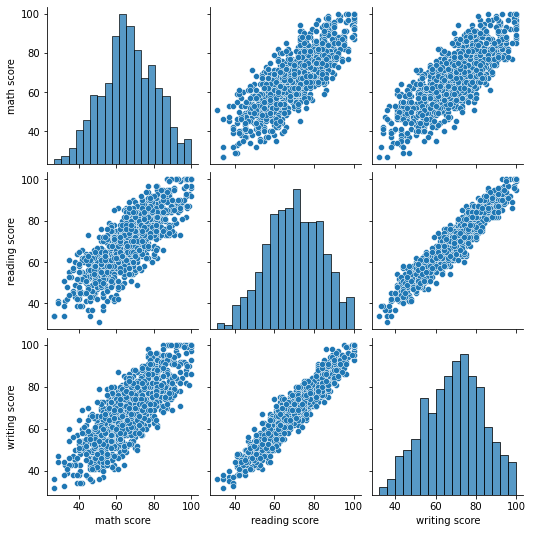

In [43]:
# using pairplot to check 
sb.pairplot(df)

### checking for normal distribution in the data

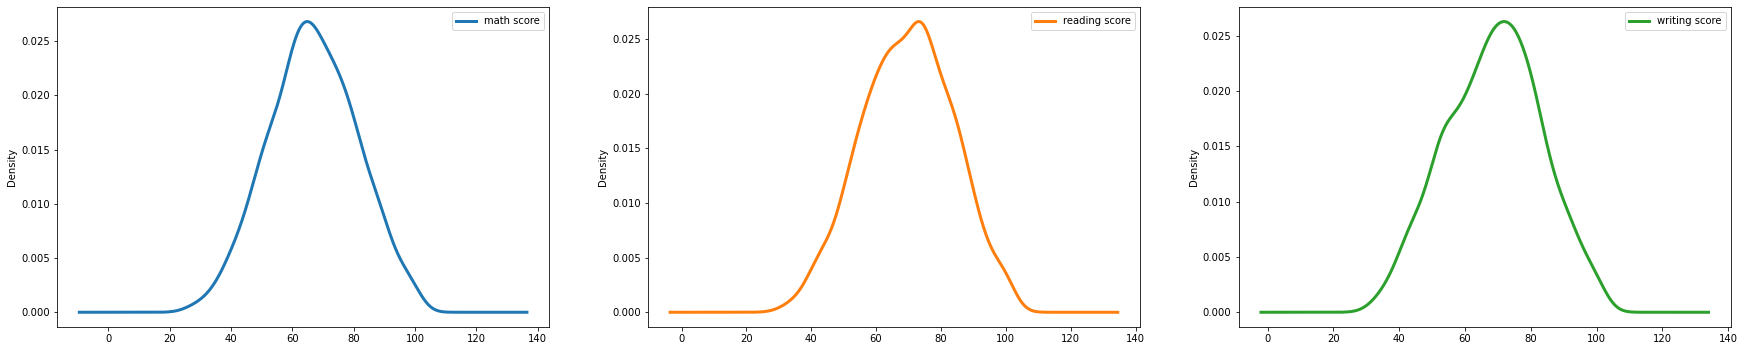

In [44]:
#checking for normal distribution in math score, reading score and writing score

from matplotlib import pyplot
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, linewidth=3)
plt.gcf().set_size_inches(30,20)
pyplot.show()

<AxesSubplot:ylabel='Density'>

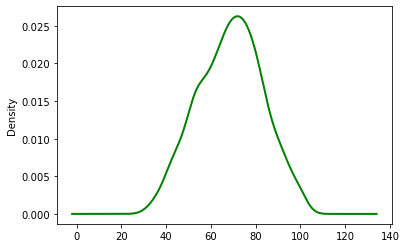

In [45]:
#checking normal distribution in writing score using density plot
df['writing score'].plot(kind='density', color='green', linewidth=2)

<AxesSubplot:xlabel='math score', ylabel='Count'>

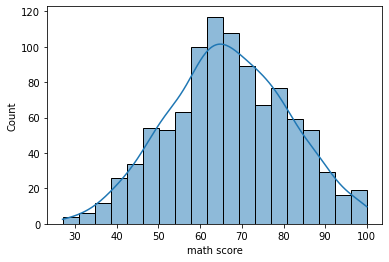

In [46]:
#checking normal distribution in math score using histogram plot
sb.histplot(df['math score'], kde=True)

### further check for normality in the data using probability plot

((array([-3.19352247e+00, -2.92799858e+00, -2.77980452e+00, -2.67527444e+00,
         -2.59371712e+00, -2.52645228e+00, -2.46898339e+00, -2.41866923e+00,
         -2.37382180e+00, -2.33329454e+00, -2.29627192e+00, -2.26215245e+00,
         -2.23047941e+00, -2.20089752e+00, -2.17312479e+00, -2.14693353e+00,
         -2.12213717e+00, -2.09858083e+00, -2.07613449e+00, -2.05468788e+00,
         -2.03414668e+00, -2.01442954e+00, -1.99546578e+00, -1.97719361e+00,
         -1.95955867e+00, -1.94251287e+00, -1.92601348e+00, -1.91002234e+00,
         -1.89450521e+00, -1.87943126e+00, -1.86477265e+00, -1.85050412e+00,
         -1.83660268e+00, -1.82304736e+00, -1.80981897e+00, -1.79689990e+00,
         -1.78427396e+00, -1.77192621e+00, -1.75984286e+00, -1.74801113e+00,
         -1.73641916e+00, -1.72505592e+00, -1.71391117e+00, -1.70297531e+00,
         -1.69223941e+00, -1.68169508e+00, -1.67133448e+00, -1.66115024e+00,
         -1.65113543e+00, -1.64128354e+00, -1.63158843e+00, -1.62204429e+00,

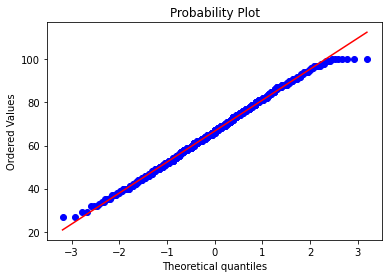

In [47]:
# probability plot for math score
stats.probplot(df['math score'], plot = plt)

((array([-3.19352247e+00, -2.92799858e+00, -2.77980452e+00, -2.67527444e+00,
         -2.59371712e+00, -2.52645228e+00, -2.46898339e+00, -2.41866923e+00,
         -2.37382180e+00, -2.33329454e+00, -2.29627192e+00, -2.26215245e+00,
         -2.23047941e+00, -2.20089752e+00, -2.17312479e+00, -2.14693353e+00,
         -2.12213717e+00, -2.09858083e+00, -2.07613449e+00, -2.05468788e+00,
         -2.03414668e+00, -2.01442954e+00, -1.99546578e+00, -1.97719361e+00,
         -1.95955867e+00, -1.94251287e+00, -1.92601348e+00, -1.91002234e+00,
         -1.89450521e+00, -1.87943126e+00, -1.86477265e+00, -1.85050412e+00,
         -1.83660268e+00, -1.82304736e+00, -1.80981897e+00, -1.79689990e+00,
         -1.78427396e+00, -1.77192621e+00, -1.75984286e+00, -1.74801113e+00,
         -1.73641916e+00, -1.72505592e+00, -1.71391117e+00, -1.70297531e+00,
         -1.69223941e+00, -1.68169508e+00, -1.67133448e+00, -1.66115024e+00,
         -1.65113543e+00, -1.64128354e+00, -1.63158843e+00, -1.62204429e+00,

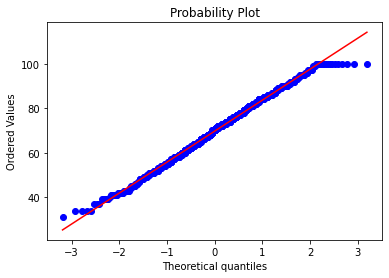

In [48]:
# probability plot for reading score
stats.probplot(df['reading score'], plot=plt)

((array([-3.19352247e+00, -2.92799858e+00, -2.77980452e+00, -2.67527444e+00,
         -2.59371712e+00, -2.52645228e+00, -2.46898339e+00, -2.41866923e+00,
         -2.37382180e+00, -2.33329454e+00, -2.29627192e+00, -2.26215245e+00,
         -2.23047941e+00, -2.20089752e+00, -2.17312479e+00, -2.14693353e+00,
         -2.12213717e+00, -2.09858083e+00, -2.07613449e+00, -2.05468788e+00,
         -2.03414668e+00, -2.01442954e+00, -1.99546578e+00, -1.97719361e+00,
         -1.95955867e+00, -1.94251287e+00, -1.92601348e+00, -1.91002234e+00,
         -1.89450521e+00, -1.87943126e+00, -1.86477265e+00, -1.85050412e+00,
         -1.83660268e+00, -1.82304736e+00, -1.80981897e+00, -1.79689990e+00,
         -1.78427396e+00, -1.77192621e+00, -1.75984286e+00, -1.74801113e+00,
         -1.73641916e+00, -1.72505592e+00, -1.71391117e+00, -1.70297531e+00,
         -1.69223941e+00, -1.68169508e+00, -1.67133448e+00, -1.66115024e+00,
         -1.65113543e+00, -1.64128354e+00, -1.63158843e+00, -1.62204429e+00,

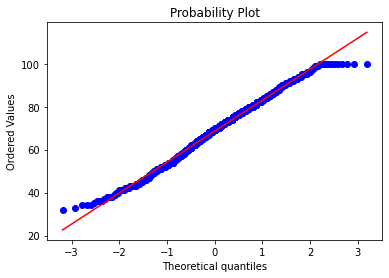

In [49]:
# probability plot for writing score
stats.probplot(df['writing score'], plot=plt)

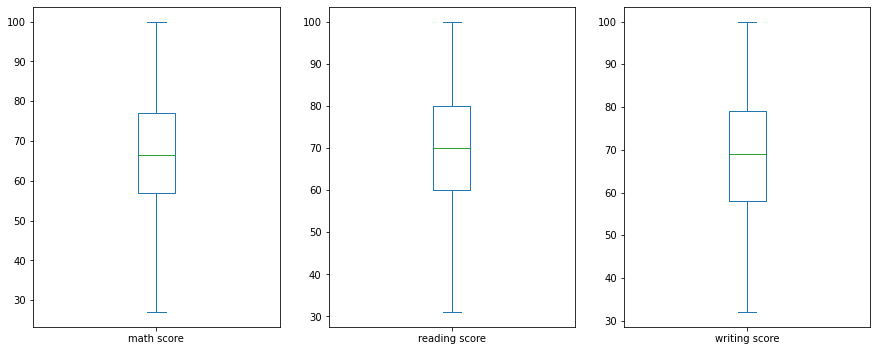

In [52]:
from matplotlib.pyplot import figure
#figure(figsize=(8, 6), dpi=80) #not part of it.
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,)
plt.rcParams["figure.figsize"] = (15,20)
plt.show()

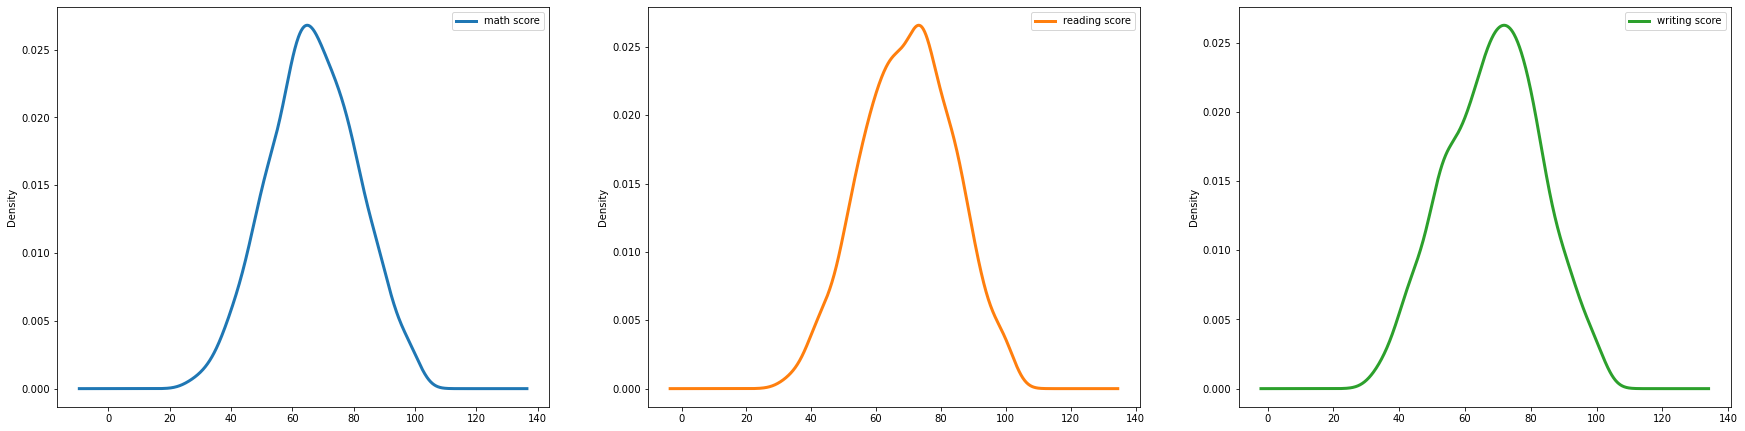

In [54]:
#checking for normal distribution in math score, reading score and writing score

from matplotlib import pyplot
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, linewidth=3)
plt.gcf().set_size_inches(30,25)
pyplot.show()

### Encoding the 5 Categorical variables: test preparation course, lunch, parental level of education, race/ethnicity & gender

In [71]:
# encoding test preparation course
test_preparation_course = pd.get_dummies(df['test preparation course'])
test_preparation_course

,completed,none
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,1,0
998,1,0


In [72]:
# encoding lunch categorical variable
lunch = pd.get_dummies(df['lunch'])
lunch

,free/reduced,standard
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
995,0,1
996,1,0
997,1,0
998,0,1


In [73]:
# encoding parental level of education
parental_level_of_education = pd.get_dummies(df['parental level of education'])
parental_level_of_education

,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
995,0,0,0,1,0,0
996,0,0,1,0,0,0
997,0,0,1,0,0,0
998,0,0,0,0,1,0


In [74]:
# encoding race/ethnicity
race_ethnicity = pd.get_dummies(df['race/ethnicity'])
race_ethnicity

,group A,group B,group C,group D,group E
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
995,0,0,0,0,1
996,0,0,1,0,0
997,0,0,1,0,0
998,0,0,0,1,0


In [75]:
# encoding gender categorical variable
gender = pd.get_dummies(df['gender'])
gender

,female,male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,1,0
998,1,0


In [76]:
# joining all the encoded categorical variables to the dataframe
df = df.join([test_preparation_course, lunch, parental_level_of_education, race_ethnicity, gender])
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,completed,none,...,master's degree,some college,some high school,group A,group B,group C,group D,group E,female,male
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,...,0,0,0,0,1,0,0,0,1,0
1,female,group C,some college,standard,completed,69,90,88,1,0,...,0,1,0,0,0,1,0,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,...,1,0,0,0,1,0,0,0,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1,...,0,0,0,1,0,0,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1,0,...,1,0,0,0,0,0,0,1,1,0
996,male,group C,high school,free/reduced,none,62,55,55,0,1,...,0,0,0,0,0,1,0,0,0,1
997,female,group C,high school,free/reduced,completed,59,71,65,1,0,...,0,0,0,0,0,1,0,0,1,0
998,female,group D,some college,standard,completed,68,78,77,1,0,...,0,1,0,0,0,0,1,0,1,0


In [81]:
# dropping the 5 categorical variables that has already been encoded as I no longer need them
df = df.drop(df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']], axis=1)
df.head()

,math score,reading score,writing score,completed,none,free/reduced,standard,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,group A,group B,group C,group D,group E,female,male
0,72,72,74,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,69,90,88,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
2,90,95,93,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
3,47,57,44,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,76,78,75,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1


In [82]:
df.shape

(986, 20)

In [94]:
#creating a copy of my dataframe so that I can standardize the copy and still remain the original form of the data
data = df.copy()
data

,math score,reading score,writing score,completed,none,free/reduced,standard,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,group A,group B,group C,group D,group E,female,male
0,72,72,74,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,69,90,88,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
2,90,95,93,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
3,47,57,44,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,76,78,75,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
996,62,55,55,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
997,59,71,65,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
998,68,78,77,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [95]:
#getting all the column names in a list
list(data.columns)

['math score',
 'reading score',
 'writing score',
 'completed',
 'none',
 'free/reduced',
 'standard',
 "associate's degree",
 "bachelor's degree",
 'high school',
 "master's degree",
 'some college',
 'some high school',
 'group A',
 'group B',
 'group C',
 'group D',
 'group E',
 'female',
 'male']

### Standardizing the data such that STD value is 1 while the mean value is 0

In [96]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [97]:
# converting the standardized data to a pandas dataframe to see how my data looks like.
dfC = pd.DataFrame(data, columns=['math score',
 'reading score',
 'writing score',
 'completed',
 'none',
 'free/reduced',
 'standard',
 "associate's degree",
 "bachelor's degree",
 'high school',
 "master's degree",
 'some college',
 'some high school',
 'group A',
 'group B',
 'group C',
 'group D',
 'group E',
 'female',
 'male'])
dfC

,math score,reading score,writing score,completed,none,free/reduced,standard,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,group A,group B,group C,group D,group E,female,male
0,0.370131,0.163761,0.371152,-0.753371,0.753371,-0.732001,0.732001,-0.537484,2.712182,-0.490155,-0.252282,-0.539051,-0.464524,-0.313042,2.094750,-0.685163,-0.600000,-0.405103,0.968056,-0.968056
1,0.160831,1.458384,1.342041,1.327368,-1.327368,-0.732001,0.732001,-0.537484,-0.368707,-0.490155,-0.252282,1.855112,-0.464524,-0.313042,-0.477384,1.459506,-0.600000,-0.405103,0.968056,-0.968056
2,1.625930,1.818002,1.688787,-0.753371,0.753371,-0.732001,0.732001,-0.537484,-0.368707,-0.490155,3.963819,-0.539051,-0.464524,-0.313042,2.094750,-0.685163,-0.600000,-0.405103,0.968056,-0.968056
3,-1.374034,-0.915092,-1.709324,-0.753371,0.753371,1.366118,-1.366118,1.860521,-0.368707,-0.490155,-0.252282,-0.539051,-0.464524,3.194455,-0.477384,-0.685163,-0.600000,-0.405103,-1.032999,1.032999
4,0.649197,0.595302,0.440501,-0.753371,0.753371,-0.732001,0.732001,-0.537484,-0.368707,-0.490155,-0.252282,1.855112,-0.464524,-0.313042,-0.477384,1.459506,-0.600000,-0.405103,-1.032999,1.032999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.486397,2.105696,1.827485,1.327368,-1.327368,-0.732001,0.732001,-0.537484,-0.368707,-0.490155,3.963819,-0.539051,-0.464524,-0.313042,-0.477384,-0.685163,-0.600000,2.468507,0.968056,-0.968056
982,-0.327535,-1.058939,-0.946483,-0.753371,0.753371,1.366118,-1.366118,-0.537484,-0.368707,2.040172,-0.252282,-0.539051,-0.464524,-0.313042,-0.477384,1.459506,-0.600000,-0.405103,-1.032999,1.032999
983,-0.536835,0.091837,-0.252991,1.327368,-1.327368,1.366118,-1.366118,-0.537484,-0.368707,2.040172,-0.252282,-0.539051,-0.464524,-0.313042,-0.477384,1.459506,-0.600000,-0.405103,0.968056,-0.968056
984,0.091065,0.595302,0.579200,1.327368,-1.327368,-0.732001,0.732001,-0.537484,-0.368707,-0.490155,-0.252282,1.855112,-0.464524,-0.313042,-0.477384,-0.685163,1.666667,-0.405103,0.968056,-0.968056


In [98]:
# checking to confirm if the standardization process was successful
dfC_convert.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
math score,986.0,-0.0,1.0,-2.77,-0.68,-0.01,0.72,2.32
reading score,986.0,-0.0,1.0,-2.79,-0.70,0.02,0.74,2.18
writing score,986.0,-0.0,1.0,-2.54,-0.74,0.02,0.72,2.17
completed,986.0,-0.0,1.0,-0.75,-0.75,-0.75,1.33,1.33
none,986.0,0.0,1.0,-1.33,-1.33,0.75,0.75,0.75
free/reduced,986.0,-0.0,1.0,-0.73,-0.73,-0.73,1.37,1.37
standard,986.0,0.0,1.0,-1.37,-1.37,0.73,0.73,0.73
associate's degree,986.0,0.0,1.0,-0.54,-0.54,-0.54,-0.54,1.86
bachelor's degree,986.0,0.0,1.0,-0.37,-0.37,-0.37,-0.37,2.71
high school,986.0,-0.0,1.0,-0.49,-0.49,-0.49,-0.49,2.04
